## Feature engineering

### $Y_\beta (x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

Where:
- $\beta = (\beta_0, \beta_1, \beta_2)$ represent the model's parameters
- $x_1, x_2$ represent the features of the model
- $Y$ represents the target (label for each row)

> Mathematical theory behind a **linear regression** is going to assume that our **residuals from our model** are ***normally distributed***

Raw data that we get, both features and target, can be negatively or positively skewed. Or can come in all shapes and sizes. <br> **Data transformation** can help the algorithm find a better solution that will end up having residuals that are actually *normally distributed*
<br> Examples:
- Log transformation: <br>

$Y_\beta (x) = \beta_0 + \beta_1 log(x_1)$
- Polynomial transformation: <br>

$Y_\beta (x) = \beta_0 + \beta_1 x_1 + \beta_2 x^2_2 + \beta_3 x^3_3$

In [70]:
# Useful functions for log transformation
from numpy import log, log1p
from scipy.stats import boxcox

# Useful function for polynomial transformation

# 1. Import the library
from sklearn.preprocessing import PolynomialFeatures

# 2. Create an instance and set a degree
polyFeat = PolynomialFeatures(degree=2)

# 3. Create the polynomial features and transform the data
# polyFeat = polyFeat.fit(X_data)         # Being X_data a DataFrame
# X_poly = polyFeat.transform(X_data)     # Now X_poly is going to be X_data squared

**Variable selction:** 
> Choosing the set of features to include in our model. <br>
> These variables **must often be transformed** even before they can be included in our model.

### Feature encoding 
Converting non-numerical features into numeric. Such as *categorical* or *ordinal* 

Two primary types:
> **Nominal**: Which is *Categorical variables* ***unordered*** <br>
(Ex. Red, Blue, Green; True or False)
<br> <br>*Approaches* to encoding *nominal* variables:
- **Binary encoding** Converts variables to either *0* or *1* <br>
(Ex. True or False)
- **One-Hot encoding** Converts to binary creating several new variables. <br>
(Ex. Red, Blue, Green)

> **Ordinal**: Which is *Categorical variables* ***ordered*** <br>
(Ex. Low, Medium, High; Cold, Warm, Hot)
<br> <br>*Approaches* to encoding *ordinal* variables:
- **Ordinal encoding** Converts ordered categories to numerical values. <br>
(Ex. Low, Medium, High *into* 1, 2, 3)

In [1]:
# Useful functions for encoding categorical variables

# Nominal
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from pandas import get_dummies # allows to create multiple columns from a single column

# Ordinal
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OrdinalEncoder

### Feature scaling
Converting the scale of numeric data so that they are on a comparable scale. **For Continuous Variables**

*Approaches* to encoding variables:
- **Standard scaling** Converts features to standard normal variables <br>
  $$\frac{x - \mu}{\sigma}\$$
- **Min-Max scaling** 
- **Robust scaling** Focused on interquartile range <br>
(Ex. Low, Medium, High)

In [2]:
# Useful functions for scaling continuous variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Activity

In [3]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [4]:
path = 'C:/Users/Javi/00_raw_data/AmesHousing.csv'

df = pd.read_csv(path)

In [5]:
print(df.shape)
df.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Before we continue we just wanna remove some useless columns
df.drop(['Order', 'PID'], axis=1, inplace=True)

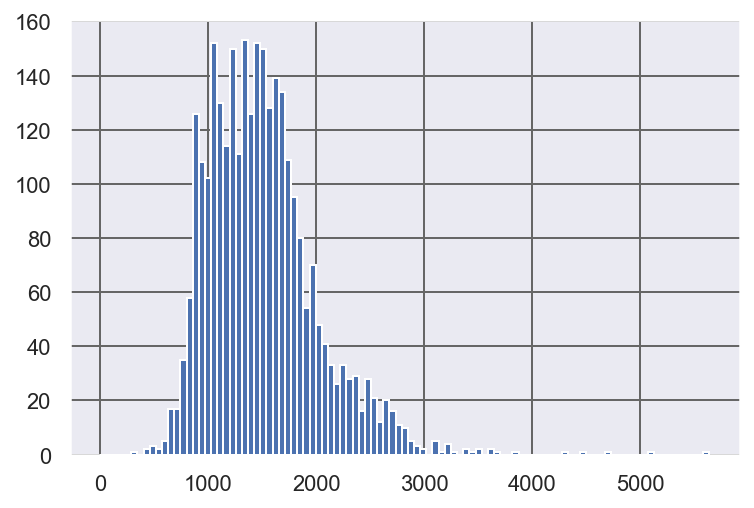

In [7]:
plt.hist(df['Gr Liv Area'], bins=np.linspace(0, df['Gr Liv Area'].max(), 100));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

There are some outliers in this variable over 4000. It is recommended by the author of this dataset to remove them

In [8]:
df = df[df['Gr Liv Area'] <= 4000]
data = df.copy()   # Keep a copy of our original data

In [9]:
df.shape

(2925, 80)

> We are going to do some data cleaning on this data to get it ready for modelling
- Making skew variables simetric (log, polynomial transformation)
- Converting categorical variables into numeric (dummies, one-hot encoding)

### Log transforming skew variables

In [10]:
# Create a list with all of the numerical variables
numerical_cols = df.select_dtypes('number').columns
print(f'There are {len(numerical_cols)} numerical variables')

# Define a skew limit. Above that limit we will run some type of transformation (log) to get that normal distribution
skew_limit = 0.75

# We want to identify which of our features have skewness
skew_variables = df.skew()

There are 37 numerical variables


In [11]:
skew_cols = skew_variables[abs(skew_variables) > skew_limit].sort_values(ascending=False)
print(f'There are {len(skew_cols)} skewed numerical variables')

There are 21 skewed numerical variables


We'll need to apply log transformation to these variables to get a **normal distribution**

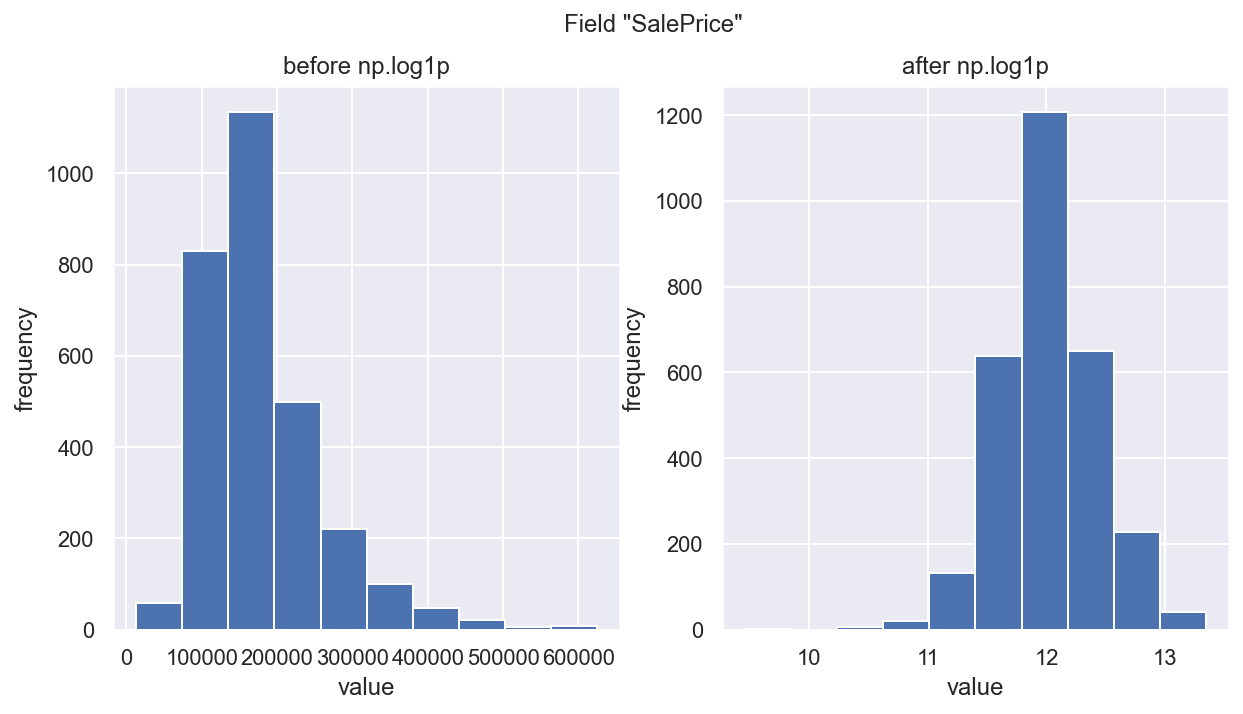

In [12]:
# Let's do it visually with one of the features

field = 'SalePrice'

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the ax_before
df[field].hist(ax=ax_before)

# Histogram on the ax_after with a log transformation
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting titles etc.
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle(f'Field "{field}"');

Fabulous <br>
Gorgeous <br>
Magic!

In [13]:
# Perform the skew transformation on all of the columns

for col in skew_cols.index.tolist():
    if col != 'SalePrice':
        df[col] = df[col].apply(np.log1p)
        
# We don't transform "SalePrice" because is going to be our TARGET VARIABLE

Going back to our original data, we see there are tons of NaNs

In [14]:
data.isna().sum().sort_values(ascending=False)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Fireplace Qu      1422
                  ... 
2nd Flr SF           0
1st Flr SF           0
Central Air          0
Sale Condition       0
MS SubClass          0
Length: 80, dtype: int64

Let's pick just a few features to work with basic transformations

In [15]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]
# Only 2 of these were log transformated previously ['Lot Area', 'Gr Liv Area']

In [16]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,9.090148,0.508309,7.170888,8.914492,9.151545,9.351493,12.279537
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
Gr Liv Area,2925.0,7.258784,0.320753,5.814131,7.027315,7.273786,7.462215,8.248267
Full Bath,2925.0,1.564786,0.551386,0.000000,1.000000,2.000000,2.000000,4.000000
Bedroom AbvGr,2925.0,2.853675,0.827737,0.000000,2.000000,3.000000,3.000000,8.000000
Fireplaces,2925.0,0.596923,0.645349,0.000000,0.000000,1.000000,1.000000,4.000000
Garage Cars,2924.0,1.765048,0.759834,0.000000,1.000000,2.000000,2.000000,5.000000


In [17]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


In [18]:
# There appears to be one NaN in "Garage Cars"
smaller_df = smaller_df.fillna('median')

In [19]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   object 
 10  SalePrice       2925 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 274.2+ KB


### Pair plot of Features
Now that we have a nice, filtered DataFrame let's geerate some visualizations to better understand relation between the features and our target variable

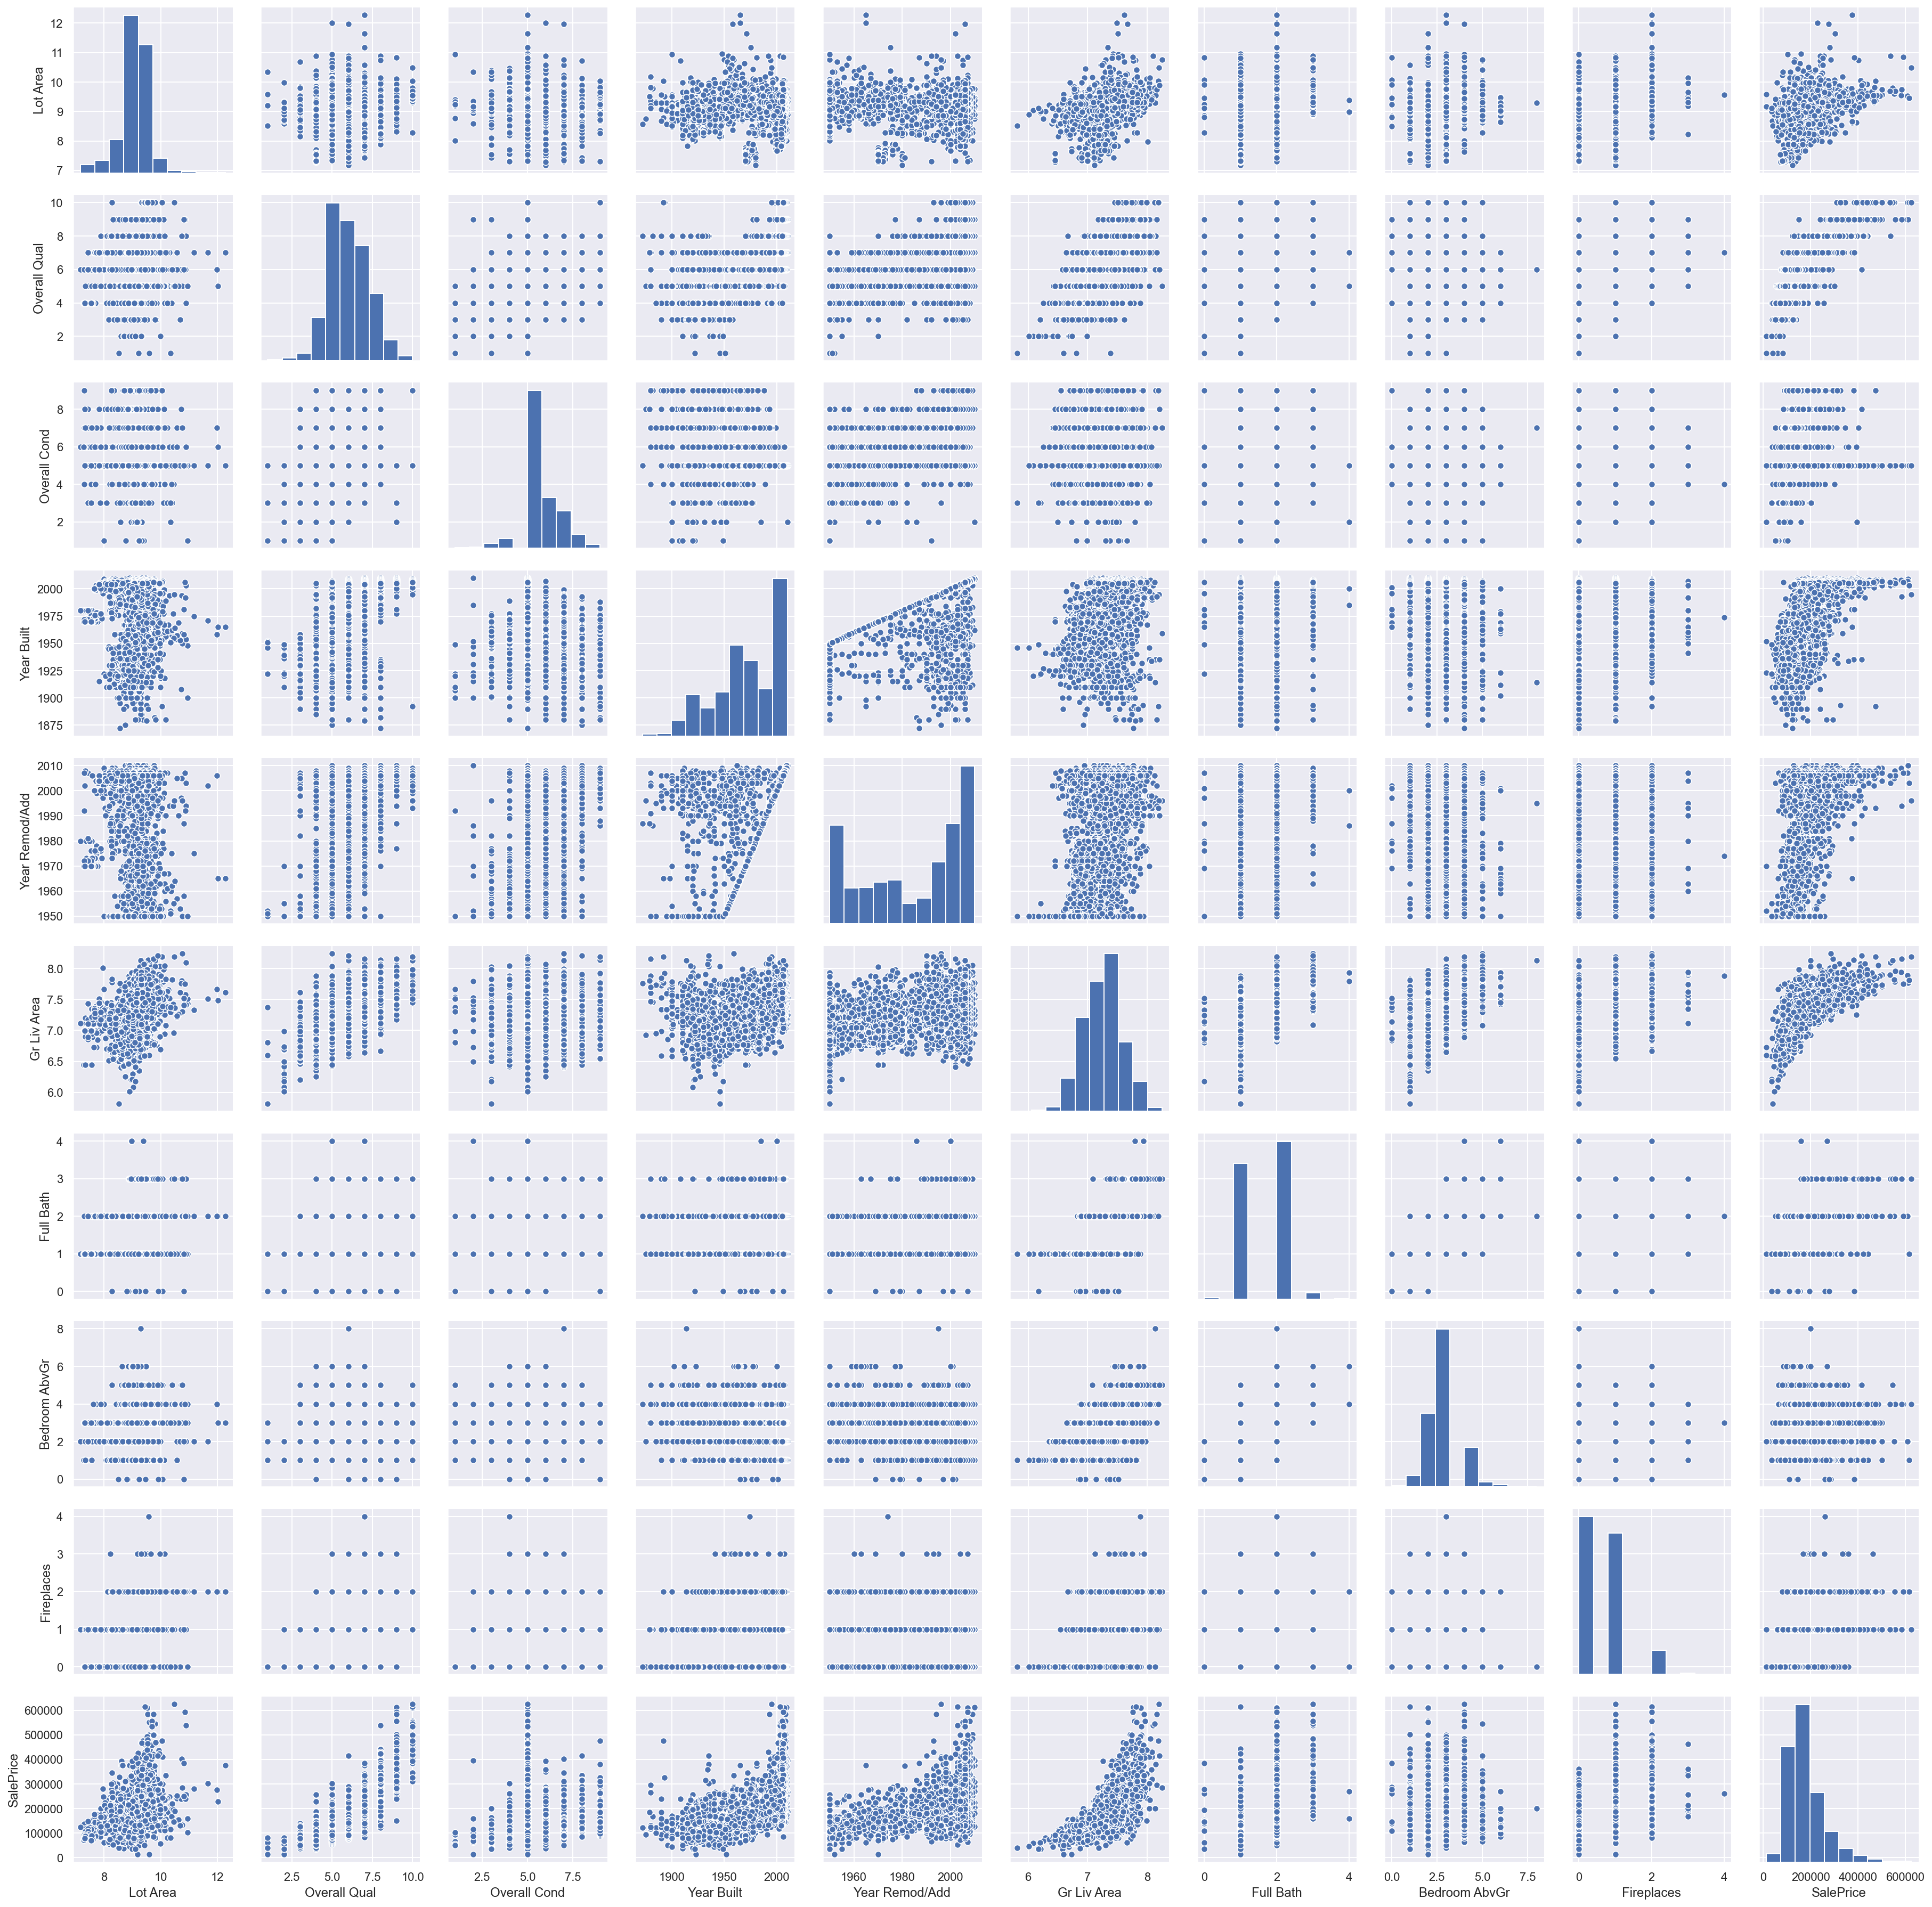

In [20]:
sns.pairplot(smaller_df)

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 
---

#### So our target variable is "SalePrice". We can set up different variables for features and target

In [21]:
X = smaller_df.drop('SalePrice', axis=1)

y = smaller_df['SalePrice']

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Area'_ , we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 

### Polynomial feature transformation

In [22]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

In [23]:
X3 = X2.copy()

In [24]:
# Multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# Division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

### Categorical variables to numeric (dummies)

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [25]:
df['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [26]:
pd.get_dummies(df['House Style'], drop_first=False)

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,1
2926,0,0,1,0,0,0,0,0
2927,0,0,0,0,0,0,1,0
2928,0,0,1,0,0,0,0,0


In [36]:
other_nbh = df['Neighborhood'].value_counts()[df['Neighborhood'].value_counts() <= 8].index

In [40]:
# Just adding a categorical feature to our small features sample.
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbh, 'Other')

#### Fancier transformation
We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

So, what we're doing is just creating a column from both a *categorical* and *numerical* feautures that represents (itself - its mean) / its std.

$$\frac{x - \mu}{\sigma}\$$

In [45]:
X5 = X4.copy()
X5['House Style'] = df['House Style']

In [65]:
def deviation(X, categorical, numerical):
    
    category_group = X.groupby(categorical)[numerical]
    
    category_median = category_group.transform(lambda x: x.median())
    category_std = category_group.transform(lambda x: x.std())
    
    deviation_feature = (X[numerical] - category_median) / category_std
    
    X[f'{categorical}_dev_{numerical}'] = deviation_feature

In [66]:
deviation(X5, 'House Style', 'Year Built')

In [68]:
deviation(X5, 'Neighborhood', 'Overall Qual')

In [69]:
X5.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_/_LA,Neighborhood,House Style,House Style_dev_Year Built,Neighborhood_dev_Overall Qual
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2,36,54.949070,11760,0.578798,NAmes,1Story,-0.430623,1.287708
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1,25,46.227161,9805,0.534146,NAmes,1Story,-0.391475,0.000000
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1,36,51.738303,11748,0.627236,NAmes,1Story,-0.508918,1.287708
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2,49,58.597755,13776,0.751058,NAmes,1Story,-0.117443,2.575416
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2,25,54.705776,9985,0.524402,Gilbert,2Story,0.061864,-2.774605


### Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
pf = PolynomialFeatures(degree=2)

In [75]:
features = ['Lot Area', 'Overall Qual']

pf.fit(df[features])

PolynomialFeatures()

In [77]:
pf.get_feature_names(input_features=features)

['1',
 'Lot Area',
 'Overall Qual',
 'Lot Area^2',
 'Lot Area Overall Qual',
 'Overall Qual^2']

In [83]:
features_array = pf.transform(df[features])

pd.DataFrame(features_array,
             columns=pf.get_feature_names(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,10.366309,6.0,107.460366,62.197855,36.0
1,1.0,9.360741,5.0,87.623475,46.803706,25.0
2,1.0,9.565775,6.0,91.504043,57.394647,36.0
3,1.0,9.320181,7.0,86.865771,65.241266,49.0
4,1.0,9.534668,5.0,90.909889,47.673339,25.0
...,...,...,...,...,...,...
2920,1.0,8.979417,6.0,80.629923,53.876500,36.0
2921,1.0,9.092232,5.0,82.668688,45.461161,25.0
2922,1.0,9.253591,5.0,85.628954,46.267957,25.0
2923,1.0,9.211440,5.0,84.850623,46.057199,25.0
